# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Get test and train data

In [4]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height to low.
Dropped 1 rows -> height to high.
Dropped 2 rows -> weight to low.
Dropped 0 rows -> weight to high.
Dropped 186 rows -> systolic bp to low.
Dropped 47 rows -> systolic bp to high.
Dropped 40 rows -> diastolic bp to low.
Dropped 948 rows -> diastolic bp to high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


# Model No. 1 - No tuning

## Create and train the model

In [15]:
#read in data
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [7]:
model = XGBClassifier()
model.fit(x_train, y_train)

print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


# Evaluation

## Prediction

In [8]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

Precision Score:
0.757184371972877

Recall Score:
0.6979166666666666

F1-Score:
0.726343503174849

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2745   752
Sick        1015  2345



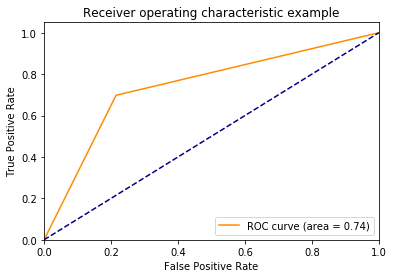


ROC Score:
0.7414376012772852


In [9]:
show_evaluation(y_test, y_pred, y_prob)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.23%


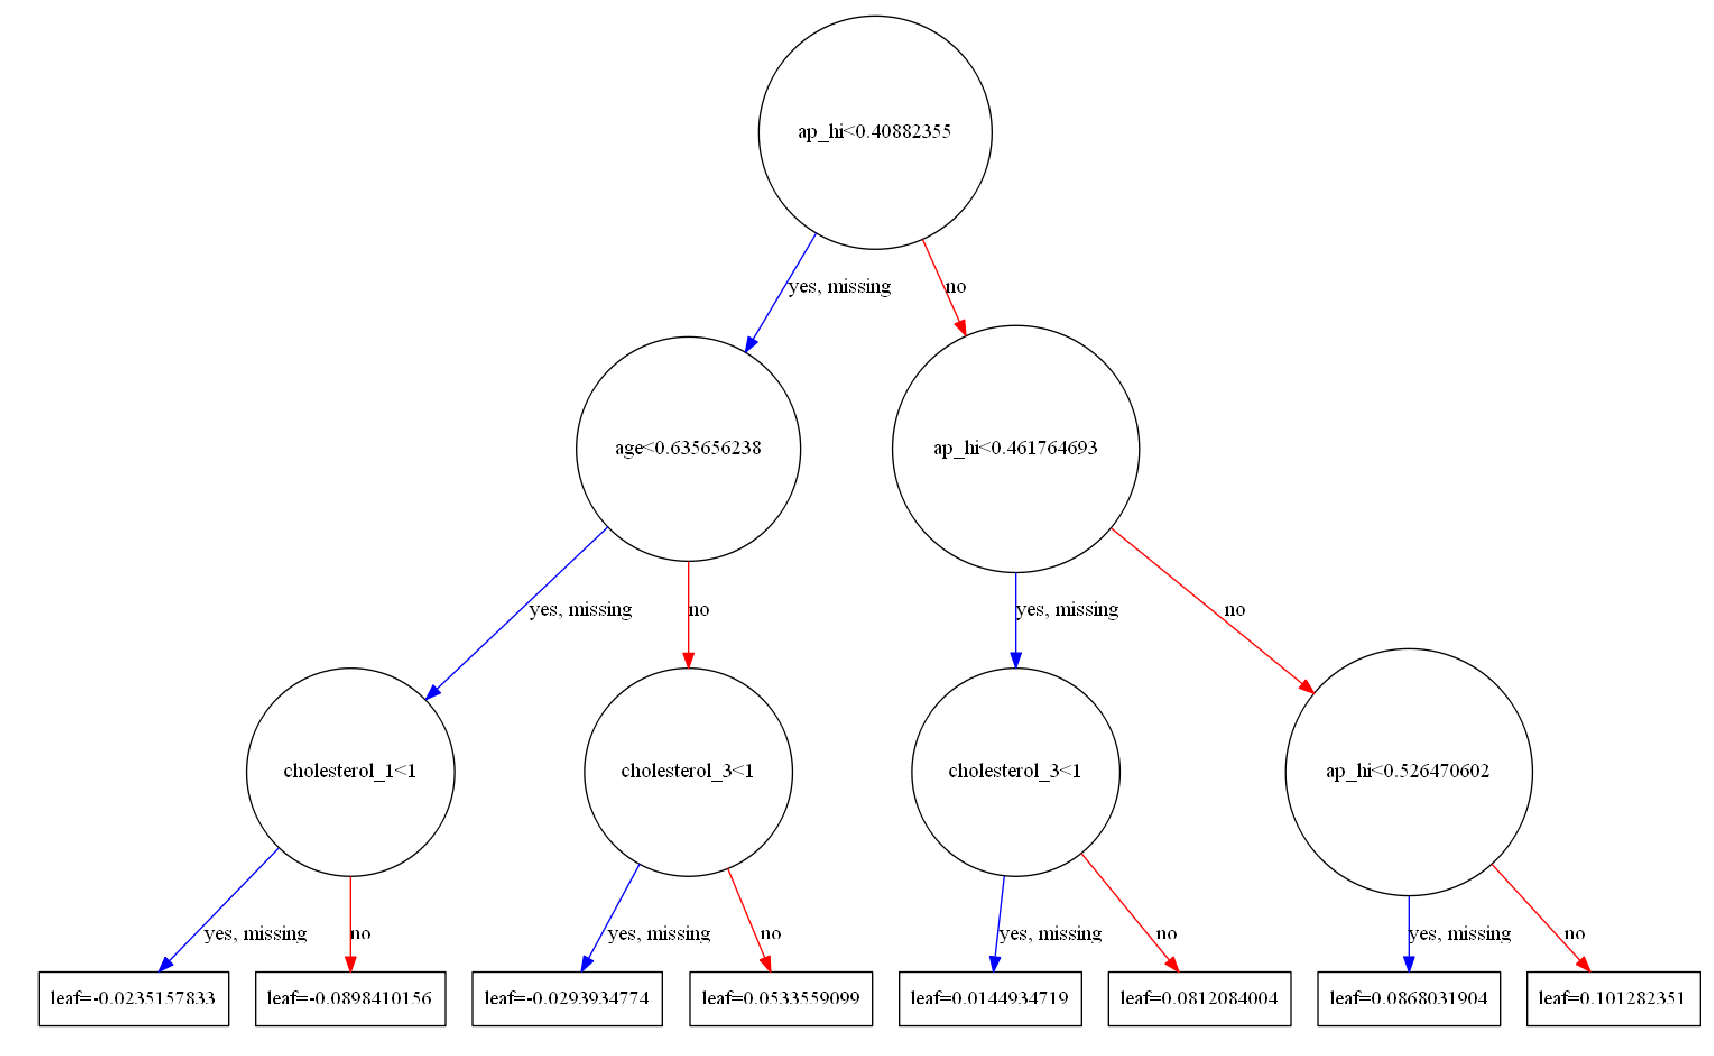

In [14]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

## Most important variables

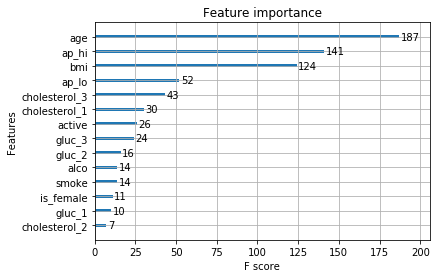

In [12]:
xgb.plot_importance(model)


# Model No.2 - With tuning

In [ ]:
#Imports
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#train = pd.read_csv('train_modified.csv')
#target = 'Disbursed'
#IDcol = 'ID'

In [16]:
#read in data
dtrain1 = xgb.DMatrix(data=x_train, label=y_train)
dtest1 = xgb.DMatrix(data=x_test, label=y_test)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [17]:
model1 = XGBClassifier(learning_rate =0.05,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model1.fit(x_train, y_train)

print(model1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)


In [18]:
y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)

Precision Score:
0.7480670103092784

Recall Score:
0.6910714285714286

F1-Score:
0.7184405940594059

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2715   782
Sick        1038  2322



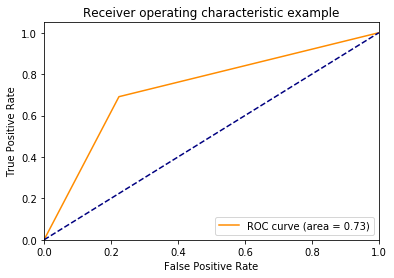


ROC Score:
0.7337255913231749


In [19]:
show_evaluation(y_test, y_pred1, y_prob1)

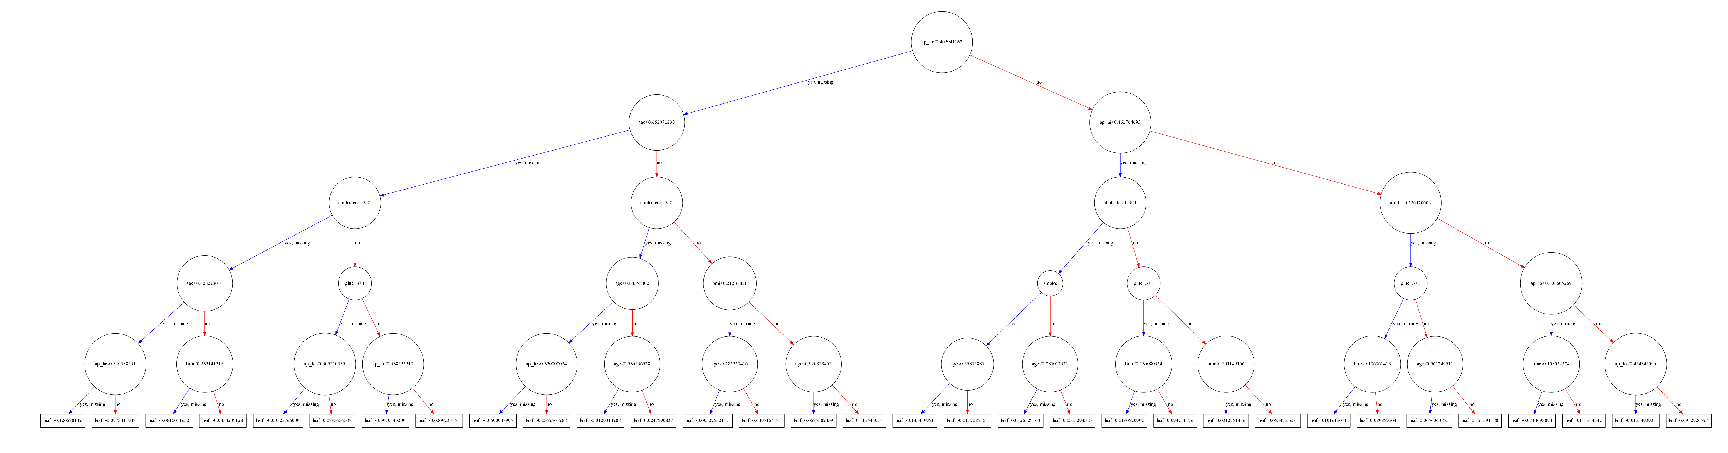

In [20]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model1, num_trees=4, ax=ax)
plt.show()

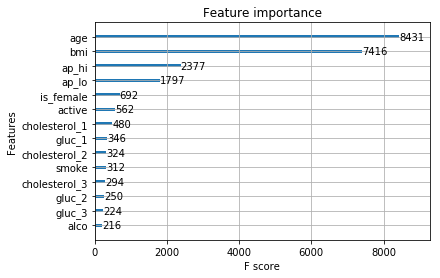

In [21]:
xgb.plot_importance(model1)